In [1]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import emcee


In [37]:
#Define our model
def my_model(lam,center,height,width): #This model is just for an example
    return height * (width/2.)**2 / ((lam - center)**2 + (width/2.)**2)

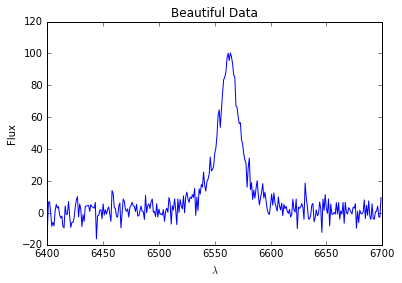

In [41]:
#Set up our fake dataset
my_lam = np.arange(6400,6700,1)#Angstroms
NOISE = 5.0
my_data = my_model(my_lam,6563,100,20) + np.random.normal(0, NOISE,len(my_lam))
my_sigmas = np.zeros(len(my_lam)) + NOISE
plt.plot(my_lam,my_data)
plt.xlabel(r'$\lambda$')
plt.ylabel('Flux')
plt.title('Beautiful Data')
plt.show()

In [42]:
#Let's make a final METRIC, Log Likelihood
def metric_log_likelihood(theta,lam,data,sigmas):
    center, height, width = theta
    return -0.5*(np.sum((data-my_model(lam,center,height,width))**2/sigmas**2 + np.log(sigmas**2)))

In [43]:
def my_log_prior(theta):
    my_priors = np.asarray([6563.,20.,15.])
    my_priors_sigmas = np.asarray([2.,5.,5.])
    center, height, width = theta
    return -0.5*(np.sum((theta-my_priors)**2/my_priors_sigmas**2 + np.log(my_priors_sigmas**2)))     

In [44]:
#Define a posterior
def my_posterior(theta,lam,data,sigmas):
    return (...)

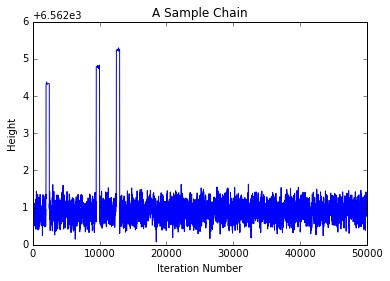

In [45]:
#Run "emcee"
ndim, nwalkers = 3, 100
p0 = [6560,90,5]
pos = [p0 + np.random.randn(ndim) for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, my_posterior, args=(my_lam, my_data, my_sigmas))
sampler.run_mcmc(pos, 1000)
samples = sampler.chain[:, 500:, :].reshape((-1, ndim))
plt.plot(samples[:,0])
plt.xlabel('Iteration Number')
plt.ylabel('Height')
plt.title('A Sample Chain')
plt.show()

In [46]:
#Chatting about Percentiles
print "CENTER",np.percentile(samples[:,0],[16,50,84])
print "HEIGHT",np.percentile(samples[:,1],16),np.percentile(samples[:,1],50),np.percentile(samples[:,1],84)
print "WIDTH",np.percentile(samples[:,2],16),np.percentile(samples[:,2],50),np.percentile(samples[:,2],84)

CENTER [ 6562.7221693   6562.92278868  6563.12288724]
HEIGHT 90.4425226252 92.0143231149 93.7647637674
WIDTH 21.1306659302 21.6719875851 22.2097317335


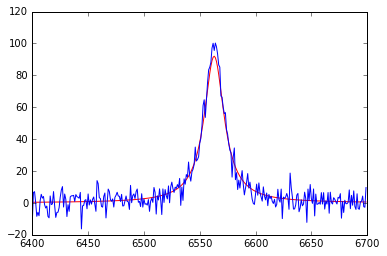

In [47]:
best_c = np.percentile(samples[:,0],50)
best_h = np.percentile(samples[:,1],50)
best_w = np.percentile(samples[:,2],50)

plt.plot(my_lam,my_model(my_lam,best_c,best_h,best_w),'r')
plt.plot(my_lam,my_data,'b')
plt.show()